In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import StandardScaler

In [36]:
df = pd.read_csv('Height-Weight.csv')

In [37]:
df

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
3496,69.296830,185.649086
3497,70.542201,210.198845
3498,73.912549,202.429960
3499,67.396021,144.277671


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3501 entries, 0 to 3500
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  3501 non-null   float64
 1   Weight  3501 non-null   float64
dtypes: float64(2)
memory usage: 54.8 KB


In [5]:
df.columns

Index(['Height', 'Weight'], dtype='object')

In [6]:
df[['Height','Weight']]

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
3496,69.296830,185.649086
3497,70.542201,210.198845
3498,73.912549,202.429960
3499,67.396021,144.277671


In [7]:
df.describe()

,Height,Weight
count,3501.000000,3501.000000
mean,69.024411,186.891258
std,2.858583,19.903132
min,59.380650,65.780000
25%,67.193523,173.896237
50%,69.044211,187.308370
75%,70.976491,200.356448
max,78.998742,269.989698


In [8]:
corelation=df[['Height','Weight']]

<AxesSubplot:>

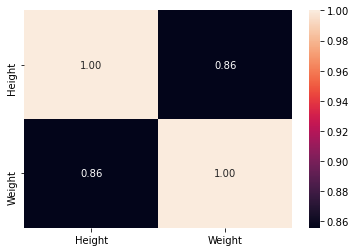

In [9]:
sns.heatmap(corelation.corr(),annot=True,fmt='0.2f')

<AxesSubplot:xlabel='Height', ylabel='Weight'>

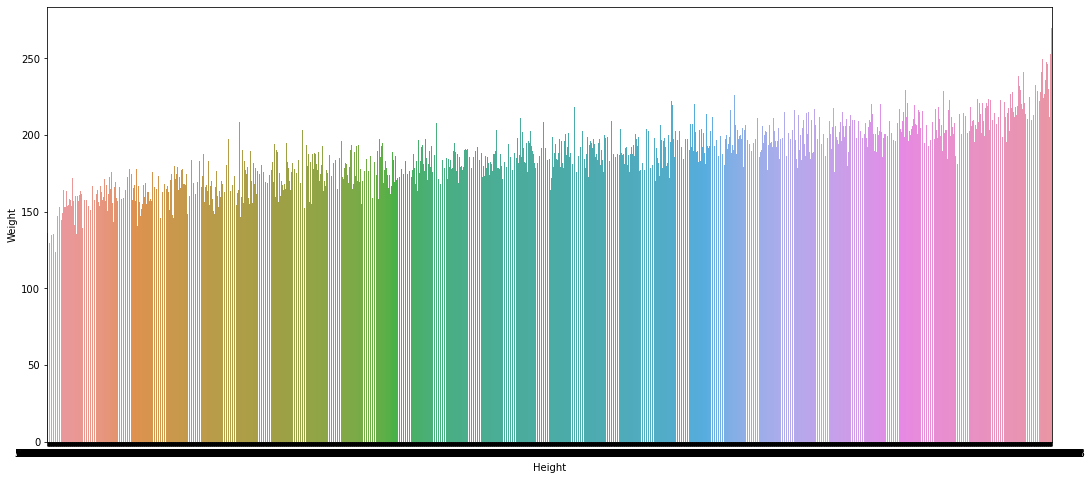

In [10]:
plt.figure(figsize=(18,8))
sns.barplot(x='Height',y='Weight',data=df)

In [11]:
x=df.drop(['Weight'],axis=1)
y=df['Weight']

In [12]:
Scaler=StandardScaler()
x=Scaler.fit_transform(x)

In [13]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3501 entries, 0 to 3500
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  3501 non-null   float64
 1   Weight  3501 non-null   float64
dtypes: float64(2)
memory usage: 54.8 KB


In [15]:
Reg=LinearRegression()
Reg.fit(xtrain,ytrain)
Reg.score(xtest,ytest)

0.7437517146778505

In [16]:
Reg.score(xtrain,ytrain)

0.729271763964062

In [17]:
Reg.fit(x,y)
Reg.score(x,y)

0.7323584758139253

Text(0.5, 1.0, 'Blue:Actual\nRed:Predicted')

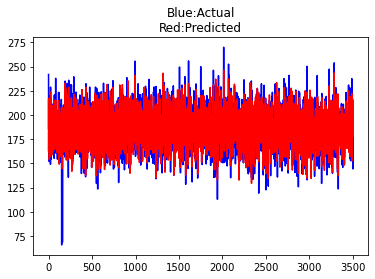

In [18]:
plt.plot(df['Weight'],color='blue')
plt.plot(Reg.predict(x),color='red')
plt.title("Blue:Actual\nRed:Predicted")

In [19]:
KNN=KNeighborsRegressor(n_neighbors=7)
KNN.fit(xtrain,ytrain)
KNN.score(xtest,ytest)

0.7026827495164991

In [20]:
KNN=KNeighborsRegressor(n_neighbors=21)
KNN.fit(xtrain,ytrain)
KNN.score(xtest,ytest)

0.7308353920226816

In [21]:
KNN=KNeighborsRegressor(n_neighbors=42)
KNN.fit(xtrain,ytrain)
KNN.score(xtest,ytest)

0.7363472566374376

In [22]:
KNN=KNeighborsRegressor(n_neighbors=45)
KNN.fit(xtrain,ytrain)
KNN.score(xtest,ytest)

0.7352398171433687

In [23]:
KNN=KNeighborsRegressor(n_neighbors=35)
KNN.fit(xtrain,ytrain)
KNN.score(xtest,ytest)

0.7349486644044978

In [24]:
KNN=KNeighborsRegressor(n_neighbors=14)
KNN.fit(xtrain,ytrain)
KNN.score(xtest,ytest)

0.7279467257782303

Text(0.5, 1.0, 'Blue:Actual\nRed:Predicted')

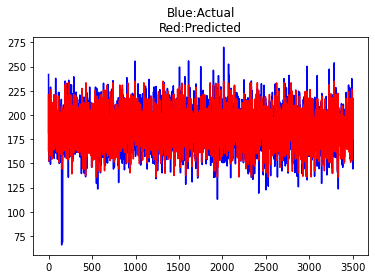

In [25]:
plt.plot(df['Weight'],color='blue')
plt.plot(KNN.predict(x),color='red')
plt.title("Blue:Actual\nRed:Predicted")

In [40]:
Algo=[Reg,KNN]
MSE=[]
MAE=[]
R2=[]
for K in Algo:
    K.fit(xtrain,ytrain)
    Pred=K.predict(xtest)
    R2.append(r2_score(ytest,Pred))
    MSE.append(mean_squared_error(ytest,Pred))
    MAE.append(mean_absolute_error(ytest,Pred))
    

In [41]:
Table=pd.DataFrame()
Table['Algorithms']=["Reg","KNN"]
Table['MSE']=MSE
Table['MAE']=MAE
Table['R2 Score']=R2



<AxesSubplot:xlabel='Algorithms', ylabel='MSE'>

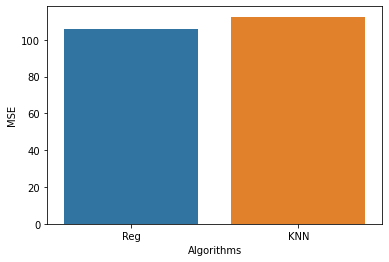

In [42]:
sns.barplot(x='Algorithms',y='MSE',data=Table)

<AxesSubplot:xlabel='Algorithms', ylabel='MAE'>

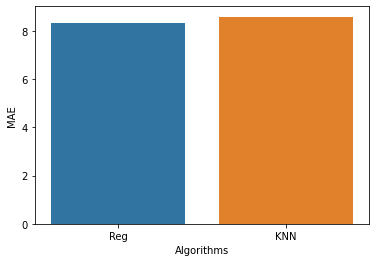

In [43]:
sns.barplot(x='Algorithms',y='MAE',data=Table)

<AxesSubplot:xlabel='Algorithms', ylabel='R2 Score'>

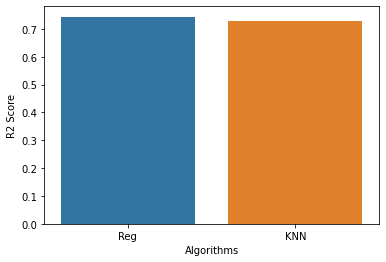

In [29]:
sns.barplot(x='Algorithms',y='R2 Score',data=Table)

In [33]:
New_df=pd.DataFrame()
New_df['Actual']=df['Weight']
New_df['Predicted']=KNN.predict(x)
New_df

,Actual,Predicted
0,241.893563,220.830501
1,162.310473,180.893628
2,212.740856,216.471088
3,220.042470,200.440850
4,206.349801,192.535058
...,...,...
3496,185.649086,191.403559
3497,210.198845,195.038222
3498,202.429960,217.564963
3499,144.277671,174.643379


In [34]:
KNN.predict(x[[73]])

array([178.41821848])